## DSC640
## Aditya Sumbaraju
## Exercise 1.2 - charts

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
from matplotlib import rc

In [92]:
df_hotdog_places = pd.read_excel('C:\BU\DSC640\ex1-2\hotdog-places.xlsm', sheet_name='hot-dog-places')
df_hotdog_places

,Location,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,East,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,Mid-West,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,West,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [93]:
hotdogs_df = pd.melt(df_hotdog_places, id_vars = ['Location'], value_vars=[2000, 2001, 2002, 2003, 2004, 2005,2006, 2007, 2008, 2009, 2010] )
hotdogs_df
hotdogs_df.rename(columns = {'variable' : 'Year','value':'Count'}, inplace = True)
hotdogs_df

,Location,Year,Count
0,East,2000,25.0
1,Mid-West,2000,24.0
2,West,2000,22.0
3,East,2001,50.0
4,Mid-West,2001,31.0
5,West,2001,23.5
6,East,2002,50.5
7,Mid-West,2002,26.0
8,West,2002,25.5
9,East,2003,44.5


In [94]:
#summary tables by year 
hotdog_year = hotdogs_df.groupby(['Year']).sum().reset_index()
#summary tables by Location
hotdog_place = hotdogs_df.groupby(['Location']).sum().reset_index()
# summary tables by year and location
hotdog_year_place = hotdogs_df.groupby(['Location','Year']).sum().reset_index()



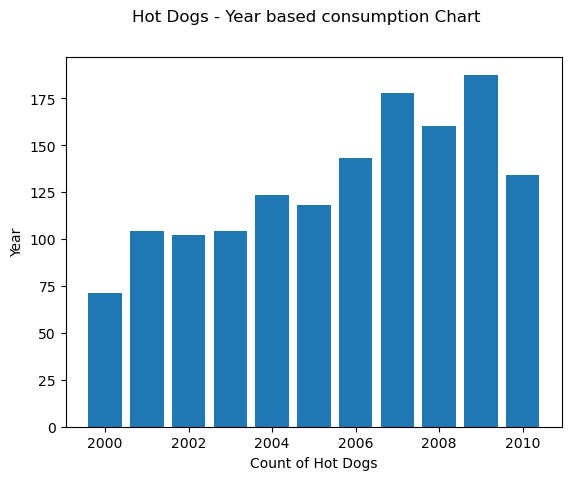

In [105]:
# Bar Graph
plt.rcdefaults()
fig, ax = plt.subplots()

#sort descending
hotdog_year = hotdog_year.sort_values(by=['Count'], ascending=True)

plt.bar(hotdog_year['Year'], hotdog_year['Count'])
ax.set_xlabel('Count of Hot Dogs')
ax.set_ylabel('Year')
fig.suptitle('Hot Dogs - Year based consumption Chart')

plt.show()

In [96]:
hotdog_year_place

,Location,Year,Count
0,East,2000,25.0
1,East,2001,50.0
2,East,2002,50.5
3,East,2003,44.5
4,East,2004,53.5
5,East,2005,49.0
6,East,2006,54.0
7,East,2007,66.0
8,East,2008,59.0
9,East,2009,68.0


In [97]:
# Slicing and dicing data based on Location
East = hotdog_year_place[hotdog_year_place['Location']=='East'].iloc[:, 2:3]
Mid_West = hotdog_year_place[hotdog_year_place['Location']=='Mid-West'].iloc[:, 2:3].reset_index()
Mid_West.drop(['index'], inplace=True, axis=1)
West = hotdog_year_place[hotdog_year_place['Location']=='West'].iloc[:, 2:3].reset_index()
West.drop(['index'], inplace=True, axis=1)
#East, Mid_West, West

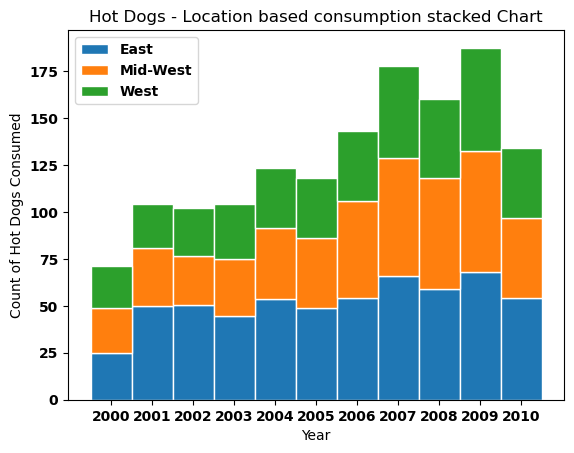

In [98]:
# Stacked Chart
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = East['Count']
bars2 = Mid_West['Count']
bars3 = West['Count']
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = first.index.tolist()
 
# Names of group and bar width
names = hotdog_year_place['Year']
barWidth = 1
names=set(names)
#names

# Create brown bars
plt.bar(r, bars1, edgecolor='white', width=barWidth, label='East')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth, label='Mid-West')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, edgecolor='white', width=barWidth, label='West')
 
# Custom X axis
plt.title('Hot Dogs - Location based consumption stacked Chart')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Year")
plt.ylabel('Count of Hot Dogs Consumed')
plt.legend()
 
# Show graphic
plt.show()

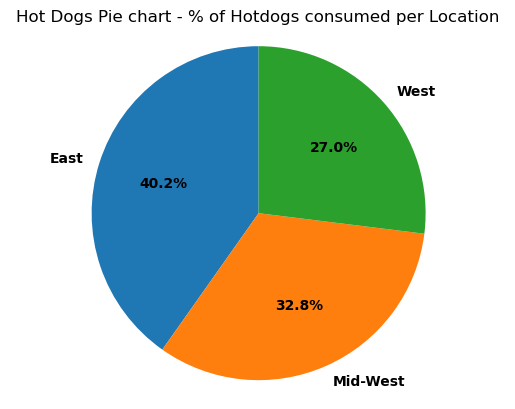

In [99]:
#pie chart
sizes = hotdog_place['Count']
labels = hotdog_place['Location']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Hot Dogs Pie chart - % of Hotdogs consumed per Location')
plt.show()

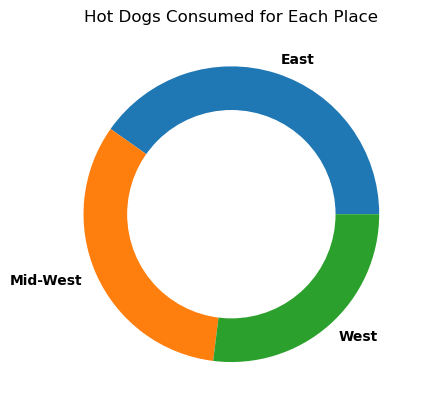

In [100]:
#donut chart
# create data
names=hotdog_place['Location']
size=hotdog_place['Count']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Hot Dogs Consumed for Each Place')
plt.show()